In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['figure.titlesize'] = 14

In [2]:
categories = ['negative', 'neutral', 'positive', 'unrelated']

p = pd.read_csv('performance/precision.csv')
p[categories] = p[categories].applymap(float)
r = pd.read_csv('performance/recall.csv')
r[categories] = r[categories].applymap(float)
f1 = pd.read_csv('performance/f1_score.csv')
f1[categories] = f1[categories].applymap(float)
a = pd.read_csv('performance/accuracy.csv')
a[['Training', 'Testing']] = a[['Training', 'Testing']].applymap(float)
a['Training'] = a['Training'] * 100
a['Testing'] = a['Testing'] * 100

/var/folders/l0/f3brd6kd23d1j64rj2yz5r100000gp/T/ipykernel_15002/578739441.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p[categories] = p[categories].applymap(float)
/var/folders/l0/f3brd6kd23d1j64rj2yz5r100000gp/T/ipykernel_15002/578739441.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r[categories] = r[categories].applymap(float)
/var/folders/l0/f3brd6kd23d1j64rj2yz5r100000gp/T/ipykernel_15002/578739441.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  f1[categories] = f1[categories].applymap(float)
/var/folders/l0/f3brd6kd23d1j64rj2yz5r100000gp/T/ipykernel_15002/578739441.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  a[['Training', 'Testing']] = a[['Training', 'Testing']].applymap(float)


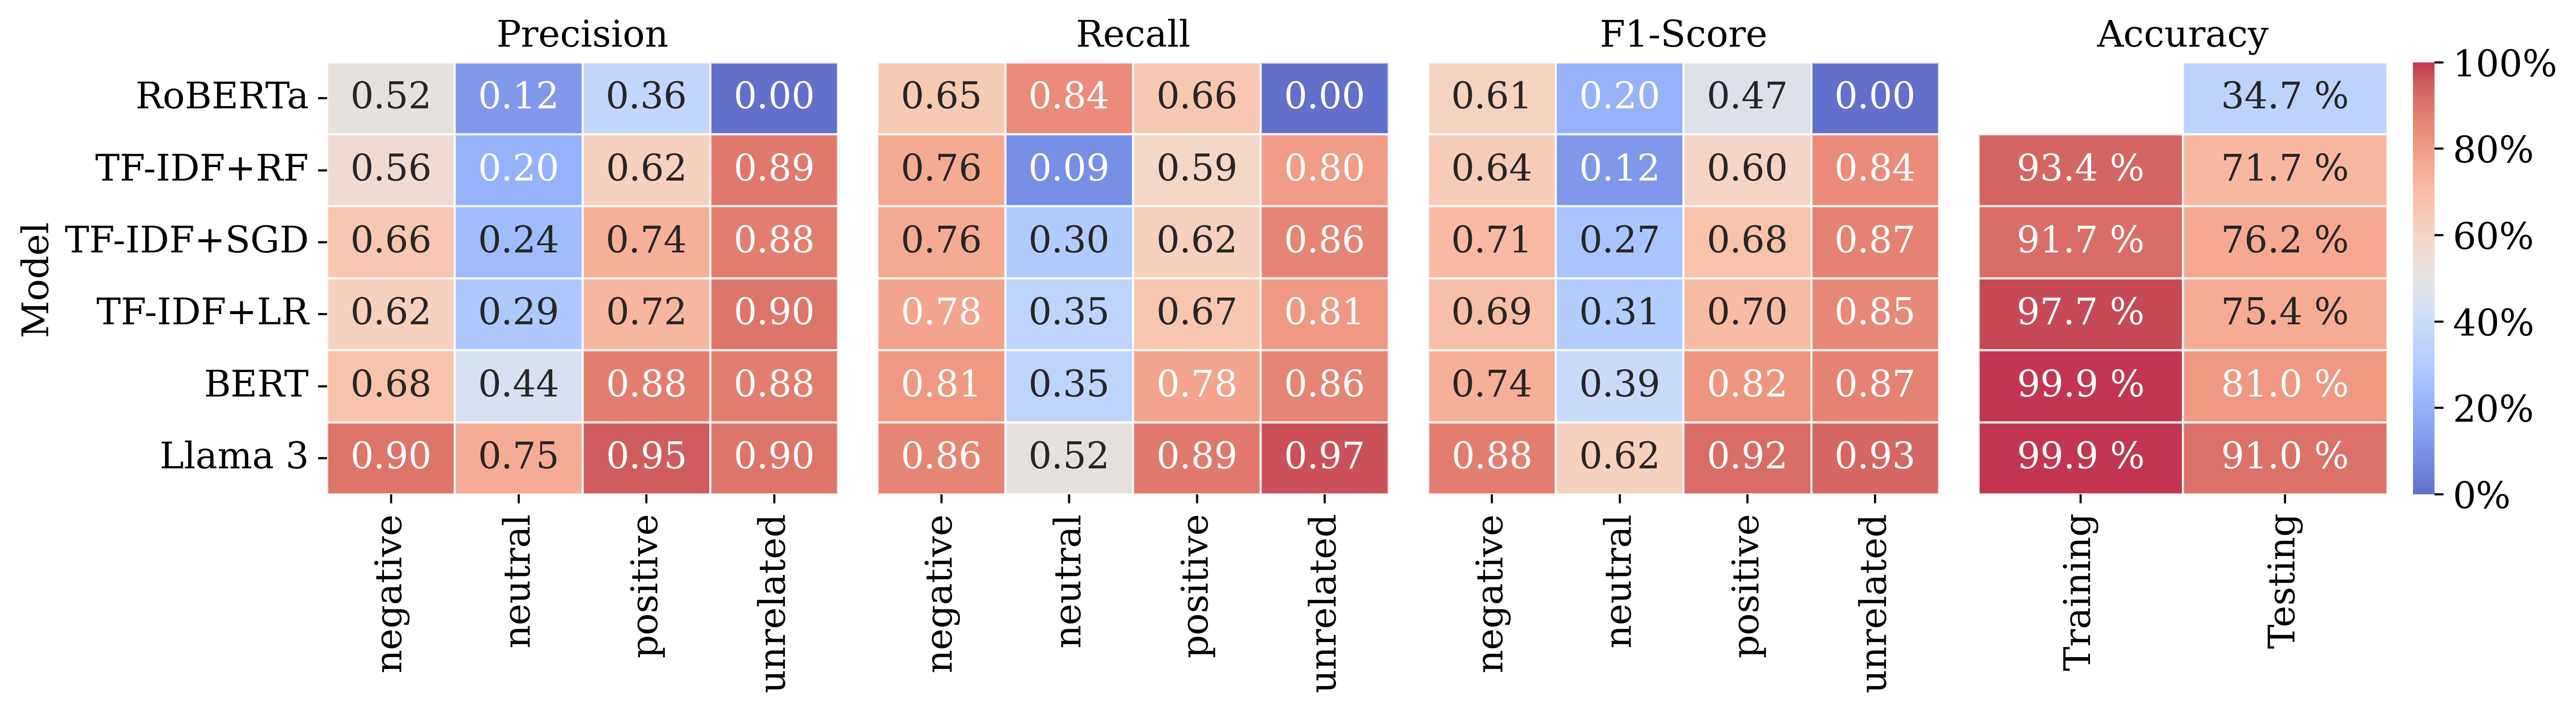

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Precision heatmap
pp = p.set_index('Model')
sns.heatmap(pp, annot=True, cmap="coolwarm", fmt='.2f', xticklabels=True, yticklabels=True,
            cbar=False, ax=axes[0], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white', alpha=0.8)
axes[0].set_title('Precision')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Recall heatmap
rr = r.set_index('Model')
sns.heatmap(rr, annot=True, cmap="coolwarm", fmt='.2f', xticklabels=True, yticklabels=False,
            cbar=False, ax=axes[1], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white', alpha=0.8)
axes[1].set_title('Recall')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylabel(None)

# F1-Score heatmap
ff1 = f1.set_index('Model')
sns.heatmap(ff1, annot=True, cmap="coolwarm", fmt='.2f', xticklabels=True, yticklabels=False,
            cbar=False, ax=axes[2], vmin=0, vmax=1.0, linewidths=0.8, linecolor='white', alpha=0.8)
axes[2].set_title('F1-Score')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylabel(None)

# Accuracy heatmap
aa = a.set_index('Model')
sns.heatmap(aa, annot=True, cmap="coolwarm", fmt='.1f', xticklabels=True, 
            yticklabels=False, ax=axes[3], vmin=0, vmax=100, cbar_kws={'format': '%.0f%%'},
            linewidths=0.8, linecolor='white', alpha=0.8)
axes[3].set_title('Accuracy')
for t in axes[3].texts: 
    t.set_text(t.get_text() + " %")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_ylabel(None)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

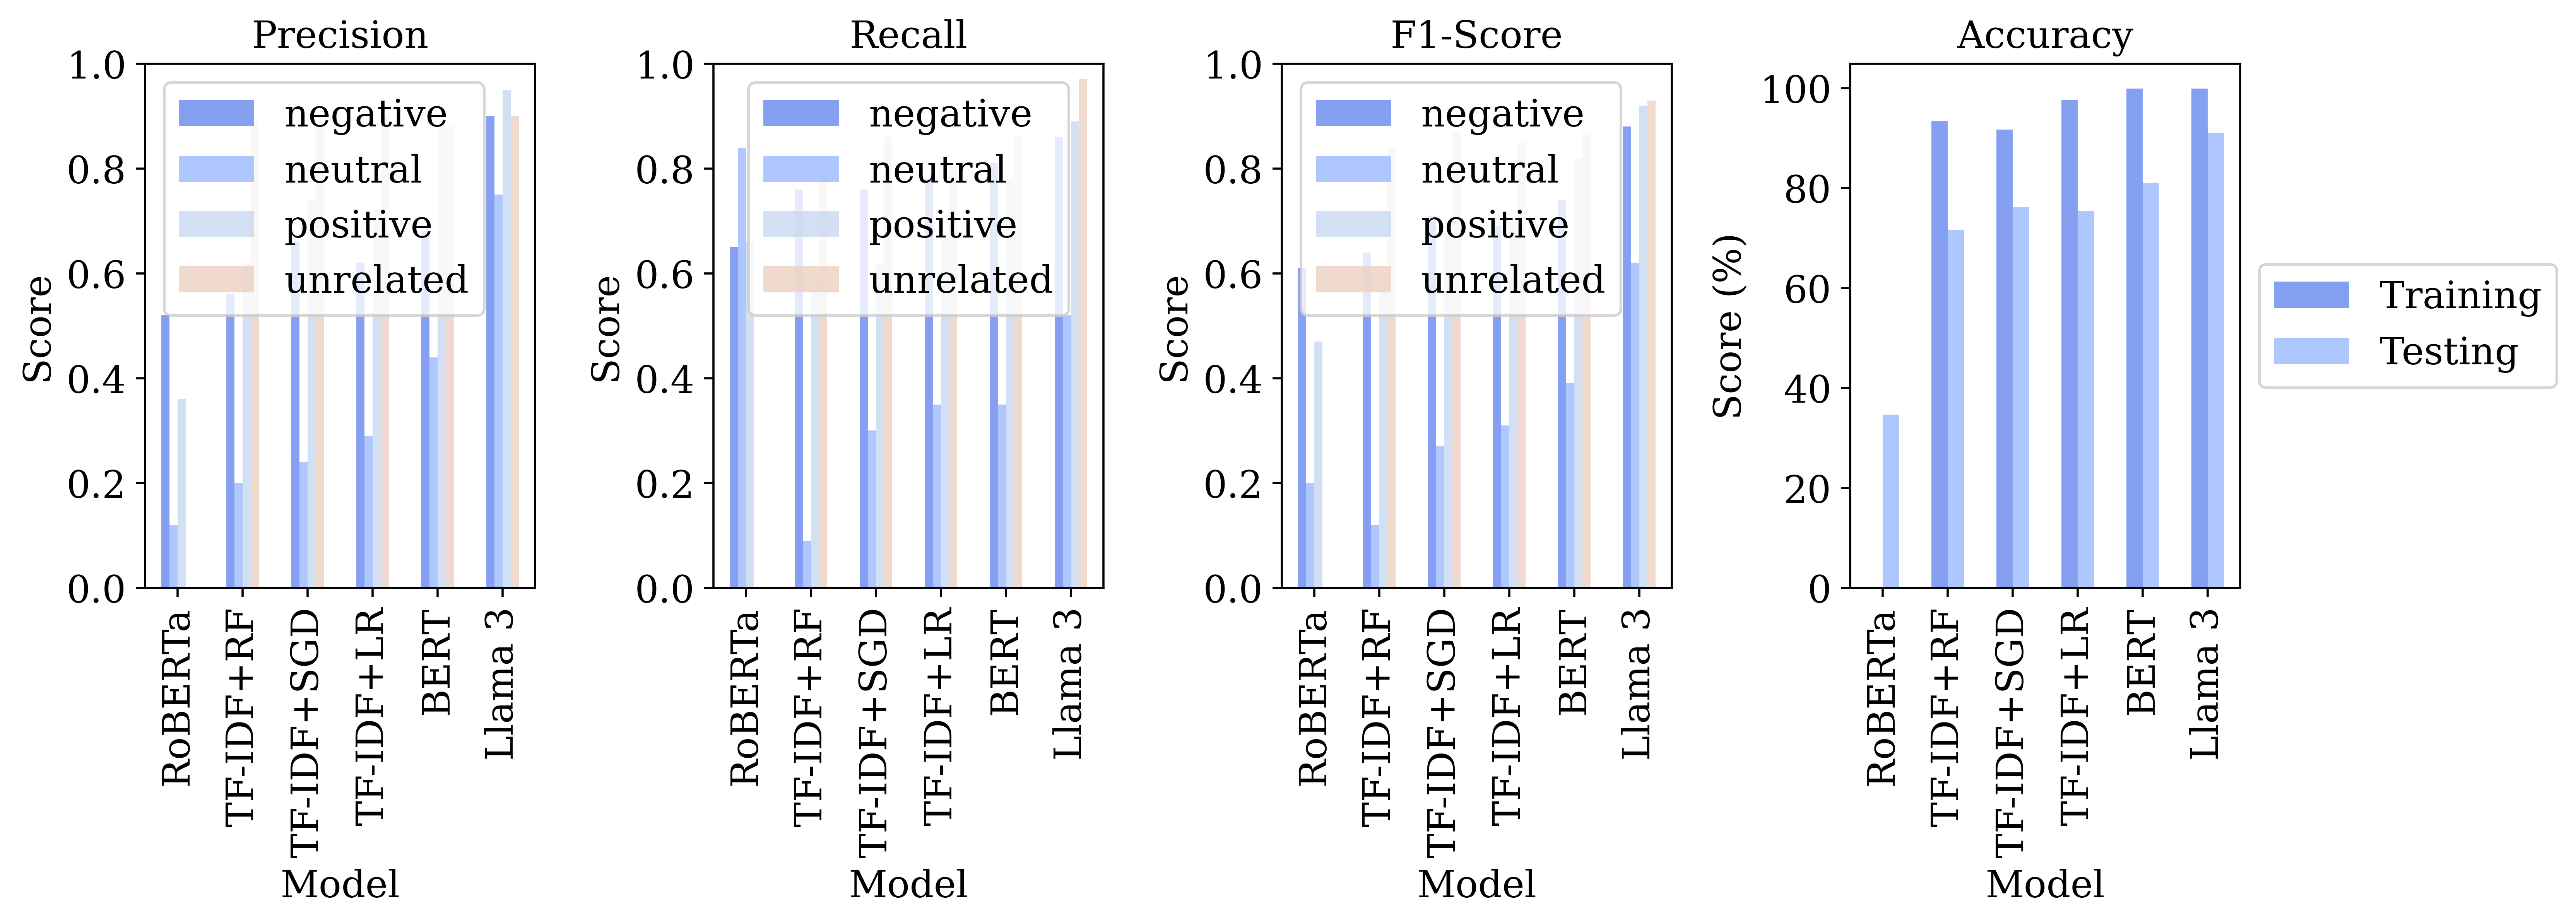

In [4]:
# Change heatmap plots to bar plots
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

# Precision bar plot
pp = p.set_index('Model')
pp.plot(kind='bar', ax=axes[0], color=sns.color_palette("coolwarm", len(pp)), alpha=0.8)
axes[0].set_title('Precision')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(pp.index, rotation=90)

# Recall bar plot
rr = r.set_index('Model')
rr.plot(kind='bar', ax=axes[1], color=sns.color_palette("coolwarm", len(rr)), alpha=0.8)
axes[1].set_title('Recall')
axes[1].set_ylabel('Score')
axes[1].set_xticklabels(rr.index, rotation=90)

# F1-Score bar plot
ff1 = f1.set_index('Model')
ff1.plot(kind='bar', ax=axes[2], color=sns.color_palette("coolwarm", len(ff1)), alpha=0.8)
axes[2].set_title('F1-Score')
axes[2].set_ylabel('Score')
axes[2].set_xticklabels(ff1.index, rotation=90)

# Accuracy bar plot
aa = a.set_index('Model')
aa.plot(kind='bar', ax=axes[3], color=sns.color_palette("coolwarm", len(aa)), alpha=0.8)
axes[3].set_title('Accuracy')
axes[3].set_ylabel('Score (%)')
axes[3].set_xticklabels(aa.index, rotation=90)

# Set consistent Y-axis limits for the first three plots
for ax in axes[:3]:
    ax.set_ylim(0, 1.0)

# Adjust layout and move legend to avoid covering the image
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust right margin
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

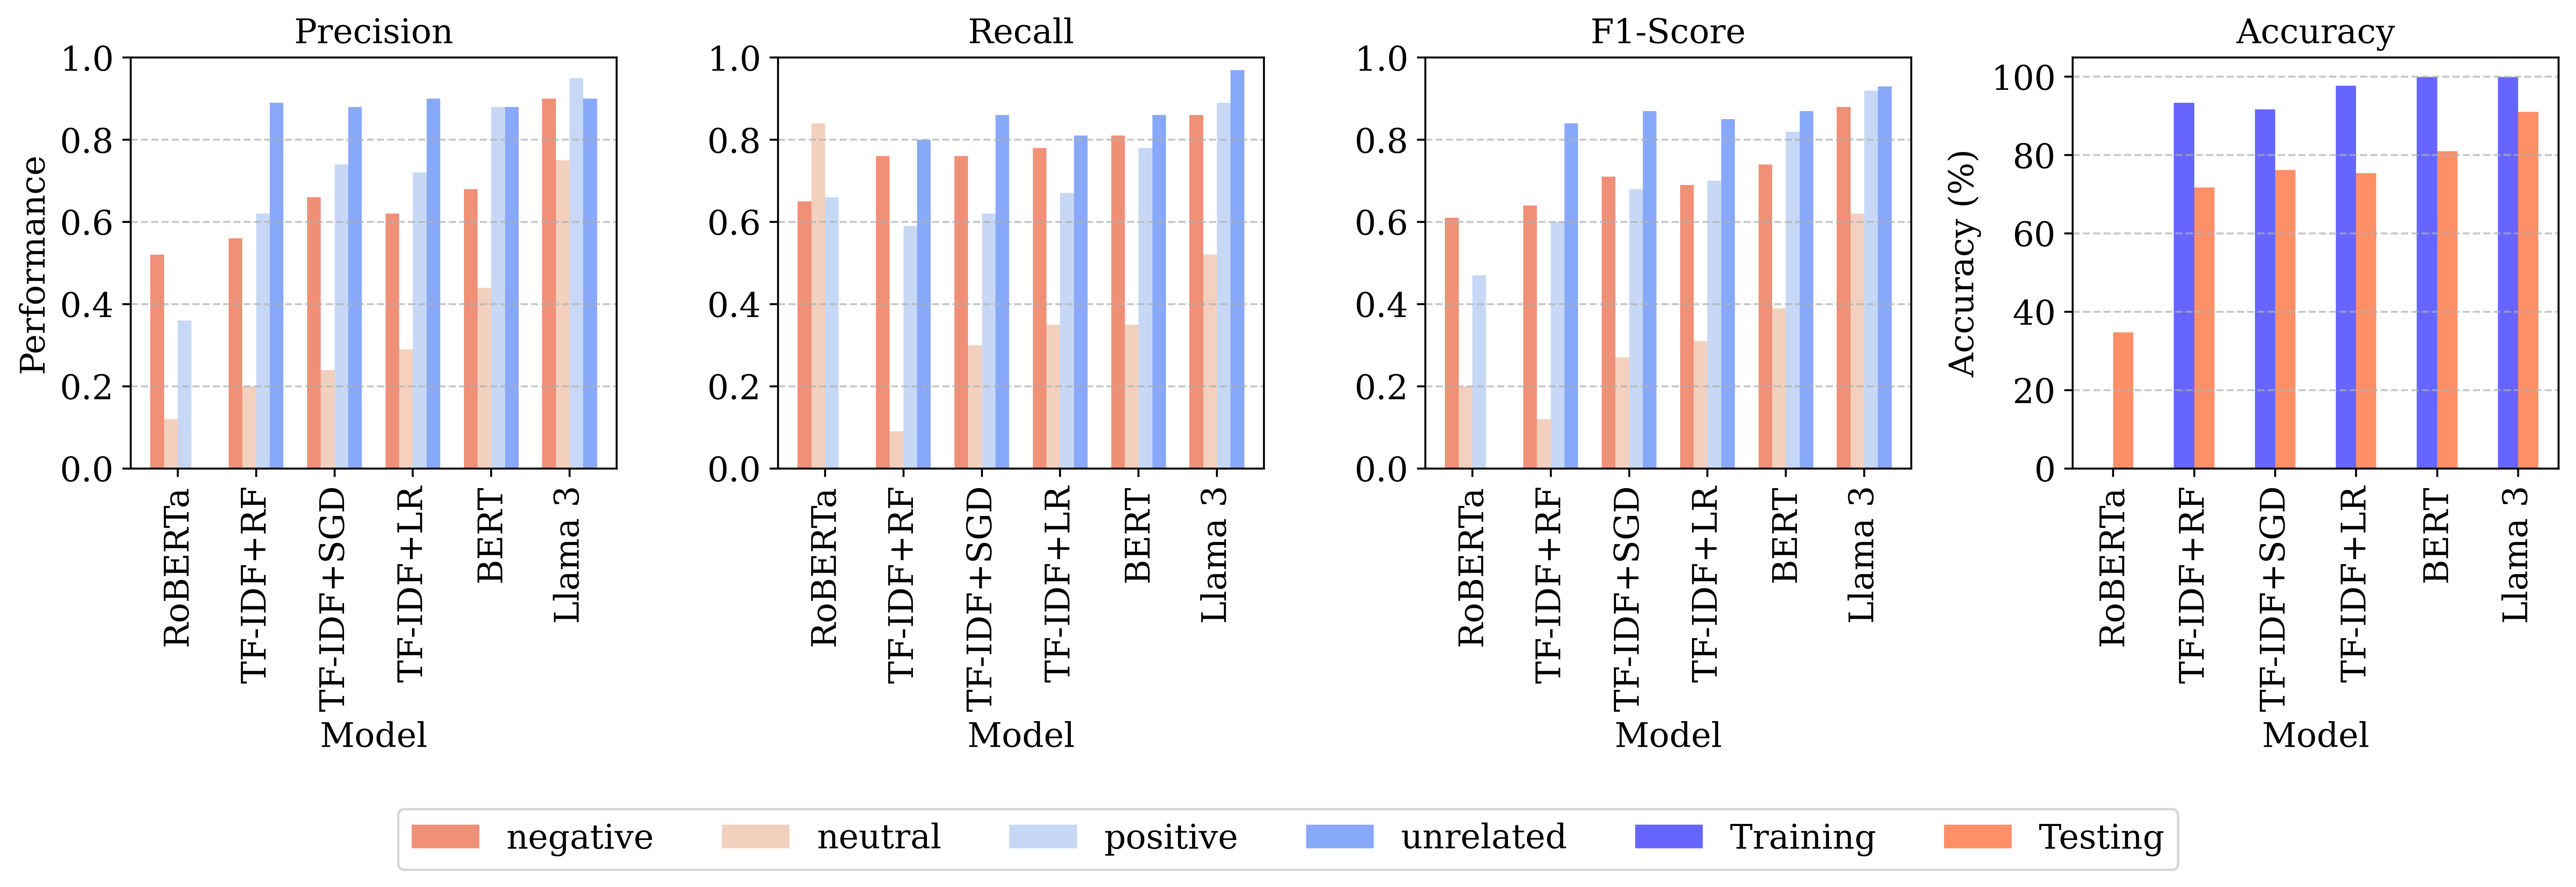

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

coolwarm_palette = sns.color_palette("coolwarm", 4)
colors = coolwarm_palette[::-1]

# Precision bar plot
pp = p.set_index('Model')
pp.plot(kind='bar', ax=axes[0], color=colors, width=0.7, alpha=0.9)
axes[0].set_title('Precision')
axes[0].set_ylabel('Performance')
axes[0].set_xticklabels(pp.index, rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7) 

# Recall bar plot
rr = r.set_index('Model')
rr.plot(kind='bar', ax=axes[1], color=colors, width=0.7, alpha=0.9)
axes[1].set_title('Recall')
axes[1].set_xticklabels(rr.index, rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7) 

# F1-Score bar plot
ff1 = f1.set_index('Model')
ff1.plot(kind='bar', ax=axes[2], color=colors, width=0.7, alpha=0.9)
axes[2].set_title('F1-Score')
axes[2].set_xticklabels(ff1.index, rotation=90)
axes[2].grid(axis='y', linestyle='--', alpha=0.7) 

# Set the same Y-axis range for the first three plots
for ax in axes[:3]:
    ax.set_ylim(0, 1.0)

# Accuracy bar plot with separate colors for Training and Testing
aa = a.set_index('Model')
aa.plot(kind='bar', ax=axes[3], color=['blue', 'orangered'], alpha=0.6)
axes[3].set_title('Accuracy')
axes[3].set_ylabel('Accuracy (%)')
axes[3].set_xticklabels(aa.index, rotation=90)
axes[3].grid(axis='y', linestyle='--', alpha=0.7) 

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to provide space at the bottom for the legend

# Combine the legends from the first three subplots and the accuracy plot
handles1, labels1 = axes[0].get_legend_handles_labels()
handles2, labels2 = axes[3].get_legend_handles_labels()

# Remove legends from individual plots
for ax in axes:
    ax.get_legend().remove()

combined_handles = handles1 + handles2
combined_labels = labels1 + labels2

fig.legend(combined_handles, combined_labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=6)
plt.subplots_adjust(bottom=0.2)
plt.show()


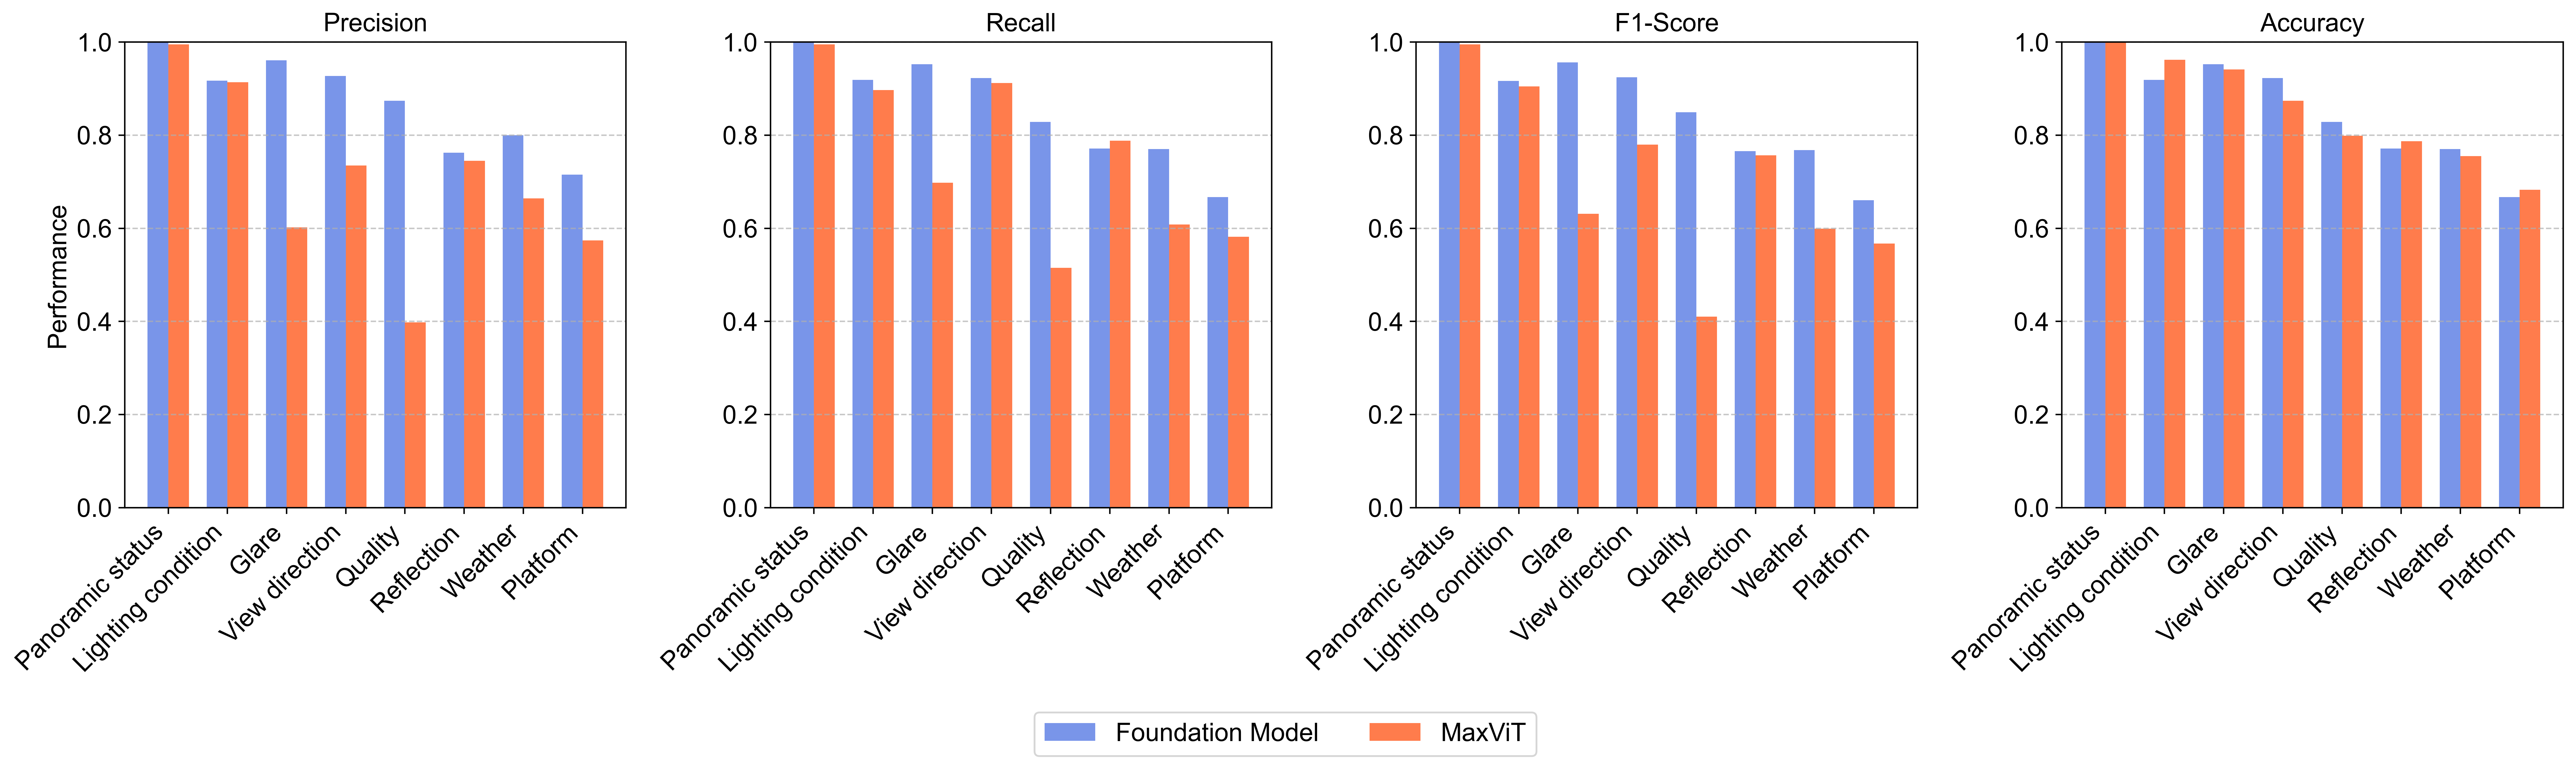

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create DataFrames for Foundation Model results
foundation_data = {
    'Label': ['Panoramic status', 'Lighting condition', 'Glare', 'View direction', 
              'Quality', 'Reflection', 'Weather', 'Platform'],
    'Precision': [0.9995, 0.9172, 0.9610, 0.9272, 0.8742, 0.7625, 0.7999, 0.7153],
    'Recall': [0.9995, 0.9188, 0.9527, 0.9225, 0.8287, 0.7711, 0.7700, 0.6669],
    'F1_Score': [0.9995, 0.9168, 0.9566, 0.9245, 0.8492, 0.7656, 0.7679, 0.6603],
    'Accuracy': [0.9995, 0.9188, 0.9527, 0.9225, 0.8287, 0.7711, 0.7700, 0.6669]
}

vgg_data = {
    'Label': ['Panoramic status', 'Lighting condition', 'Glare', 'View direction', 
              'Quality', 'Reflection', 'Weather', 'Platform'],
    'Precision': [0.995, 0.914, 0.602, 0.735, 0.398, 0.745, 0.664, 0.574],
    'Recall': [0.995, 0.897, 0.698, 0.912, 0.515, 0.788, 0.608, 0.582],
    'F1_Score': [0.995, 0.905, 0.631, 0.780, 0.410, 0.757, 0.599, 0.567],
    'Accuracy': [0.999, 0.962, 0.941, 0.874, 0.799, 0.787, 0.755, 0.683]
}

# Create DataFrames
df_foundation = pd.DataFrame(foundation_data)
df_vgg = pd.DataFrame(vgg_data)

# Set up the plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = ['Precision', 'Recall', 'F1_Score', 'Accuracy']
titles = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Create bar plots for each metric
for idx, (metric, title) in enumerate(zip(metrics, titles)):
    x = np.arange(len(df_foundation['Label']))
    width = 0.35
    
    axes[idx].bar(x - width/2, df_foundation[metric], width, label='Foundation Model',
                 color='royalblue', alpha=0.7)
    axes[idx].bar(x + width/2, df_vgg[metric], width, label='MaxViT',
                 color='orangered', alpha=0.7)
    
    axes[idx].set_title(title)
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(df_foundation['Label'], rotation=45, ha='right')
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[idx].set_ylim(0, 1.0)
    
    if idx == 0:  # Only add y-label to the first subplot
        axes[idx].set_ylabel('Performance')

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=2, bbox_transform=fig.transFigure)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend

# Show the plot
plt.show()